In [ ]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
my_data= pd.read_csv('Data.csv')

In [ ]:
my_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
my_data.shape

(110527, 14)

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110527 non-null  object        
 1   ScheduledDay     110527 non-null  datetime64[ns]
 2   AppointmentDay   110527 non-null  datetime64[ns]
 3   Scholarship      110527 non-null  int64         
 4   Hypertension     110527 non-null  int64         
 5   Diabetes         110527 non-null  int64         
 6   Alcoholism       110527 non-null  int64         
 7   Handicap         110527 non-null  int64         
 8   SMS              110527 non-null  int64         
 9   NoShow           110527 non-null  int64         
 10  scheduled_day    110527 non-null  int64         
 11  appointment_day  110527 non-null  int64         
 12  Age_group        106987 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(9), object(1)
memory usage: 10.2+

In [ ]:
#converting the date and time into standard format
my_data['ScheduledDay'] = pd.to_datetime(my_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
my_data['AppointmentDay'] = pd.to_datetime(my_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [ ]:
my_data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [ ]:
#0 is for Monday and so on 5 is Saturday and 6 is Sunday
my_data['scheduled_day'] = my_data['ScheduledDay'].dt.dayofweek

In [ ]:
my_data['appointment_day'] = my_data['AppointmentDay'].dt.dayofweek

In [ ]:
my_data['scheduled_day'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: scheduled_day, dtype: int64

In [ ]:
my_data['appointment_day'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: appointment_day, dtype: int64

In [ ]:
my_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'scheduled_day', 'appointment_day'],
      dtype='object')

In [ ]:
#Rename the column names
my_data=my_data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMS','No-show': 'NoShow'})

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110527 non-null  float64       
 1   AppointmentID    110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   ScheduledDay     110527 non-null  datetime64[ns]
 4   AppointmentDay   110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  SMS              110527 non-null  int64         
 13  NoShow           110527 non-null  object        
 14  scheduled_day    110

In [ ]:
#Let us now drop some columns which are not required
my_data.drop(['PatientId', 'AppointmentID','Neighbourhood'],axis=1,inplace =True)

In [ ]:
my_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,NoShow,scheduled_day,appointment_day
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [ ]:
#descriptive statistics woeking only on numerical values not categorical values
my_data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,scheduled_day,appointment_day
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


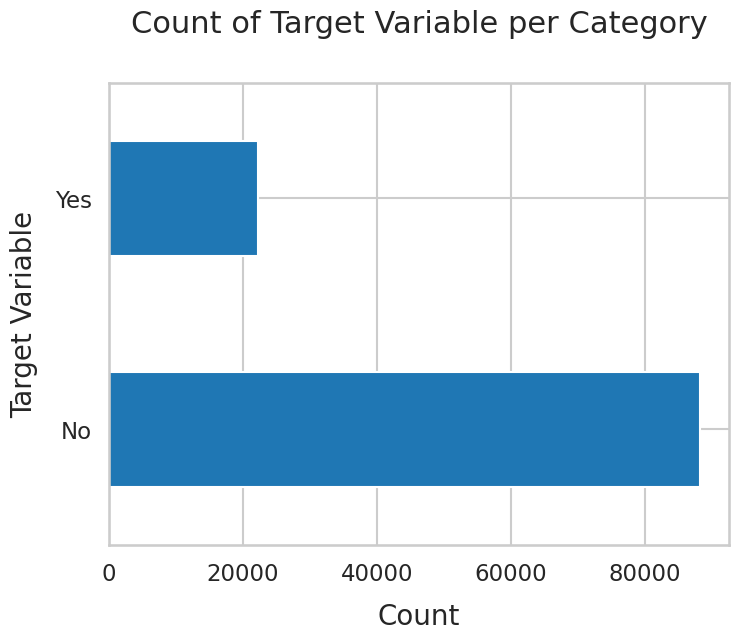

In [ ]:
#plotting our target variable by using a bar plot graph
my_data['NoShow'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=12)
plt.ylabel("Target Variable",labelpad=12)
plt.title("Count of Target Variable per Category",y=1.02);

In [ ]:
# Calculate the percentage of Appointments shown or not
100*my_data['NoShow'].value_counts()/len(my_data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

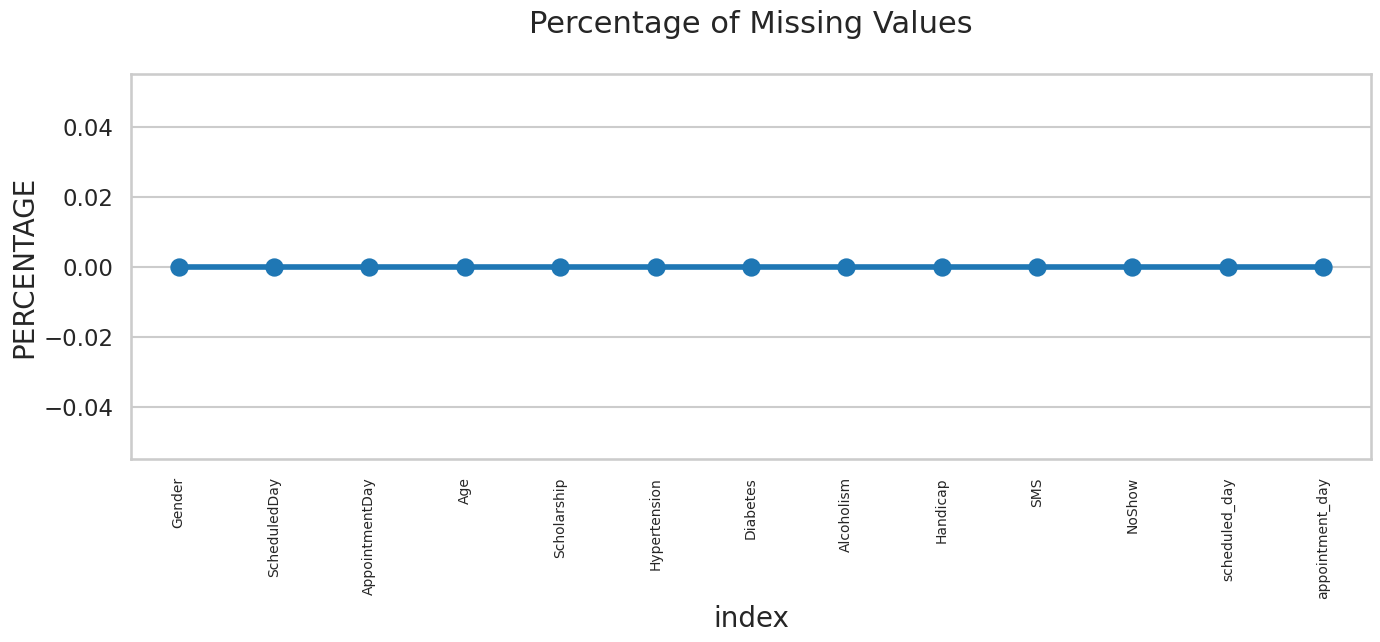

In [ ]:
#Let us now check is the data has missing values or not
missing_data = pd.DataFrame((my_data.isnull().sum())*100/my_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(data=missing_data, x='index', y=0)
plt.xticks(rotation = 90,fontsize = 10)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

# **Data Cleaning:**

1. Let us now create a copy of my_data and use it for manipulating and processing our data

In [ ]:
newmy_data = my_data.copy()

In [ ]:
newmy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110527 non-null  object        
 1   ScheduledDay     110527 non-null  datetime64[ns]
 2   AppointmentDay   110527 non-null  datetime64[ns]
 3   Age              110527 non-null  int64         
 4   Scholarship      110527 non-null  int64         
 5   Hypertension     110527 non-null  int64         
 6   Diabetes         110527 non-null  int64         
 7   Alcoholism       110527 non-null  int64         
 8   Handicap         110527 non-null  int64         
 9   SMS              110527 non-null  int64         
 10  NoShow           110527 non-null  object        
 11  scheduled_day    110527 non-null  int64         
 12  appointment_day  110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


2. We can clearly see that there are no NULL records in our data so no data cleaning is required!

In [ ]:
#Get the maximum age of the patients
print(my_data['Age'].max())

115


In [ ]:
# Now group the age in bins or groups according to 12 months
bins = ["{0} - {1}".format(i,i + 20) for i in range(1, 118, 20)]
my_data['Age_group'] = pd.cut(my_data.Age, range(1,130,20), right= False, labels = bins)

In [ ]:
my_data.drop(['Age'], axis=1, inplace = True)

# **Data Exploration:**

In [ ]:
list(my_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS',
 'NoShow',
 'scheduled_day',
 'appointment_day',
 'Age_group']

In [ ]:
my_data['NoShow'] = np.where(my_data.NoShow == 'Yes',1 , 0)

In [ ]:
my_data.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [ ]:
# Convert all the categorical variables into dummy variables
my_data_dummies = pd.get_dummies(my_data)
my_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS,NoShow,scheduled_day,appointment_day,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<ipython-input-86-781d46987de6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

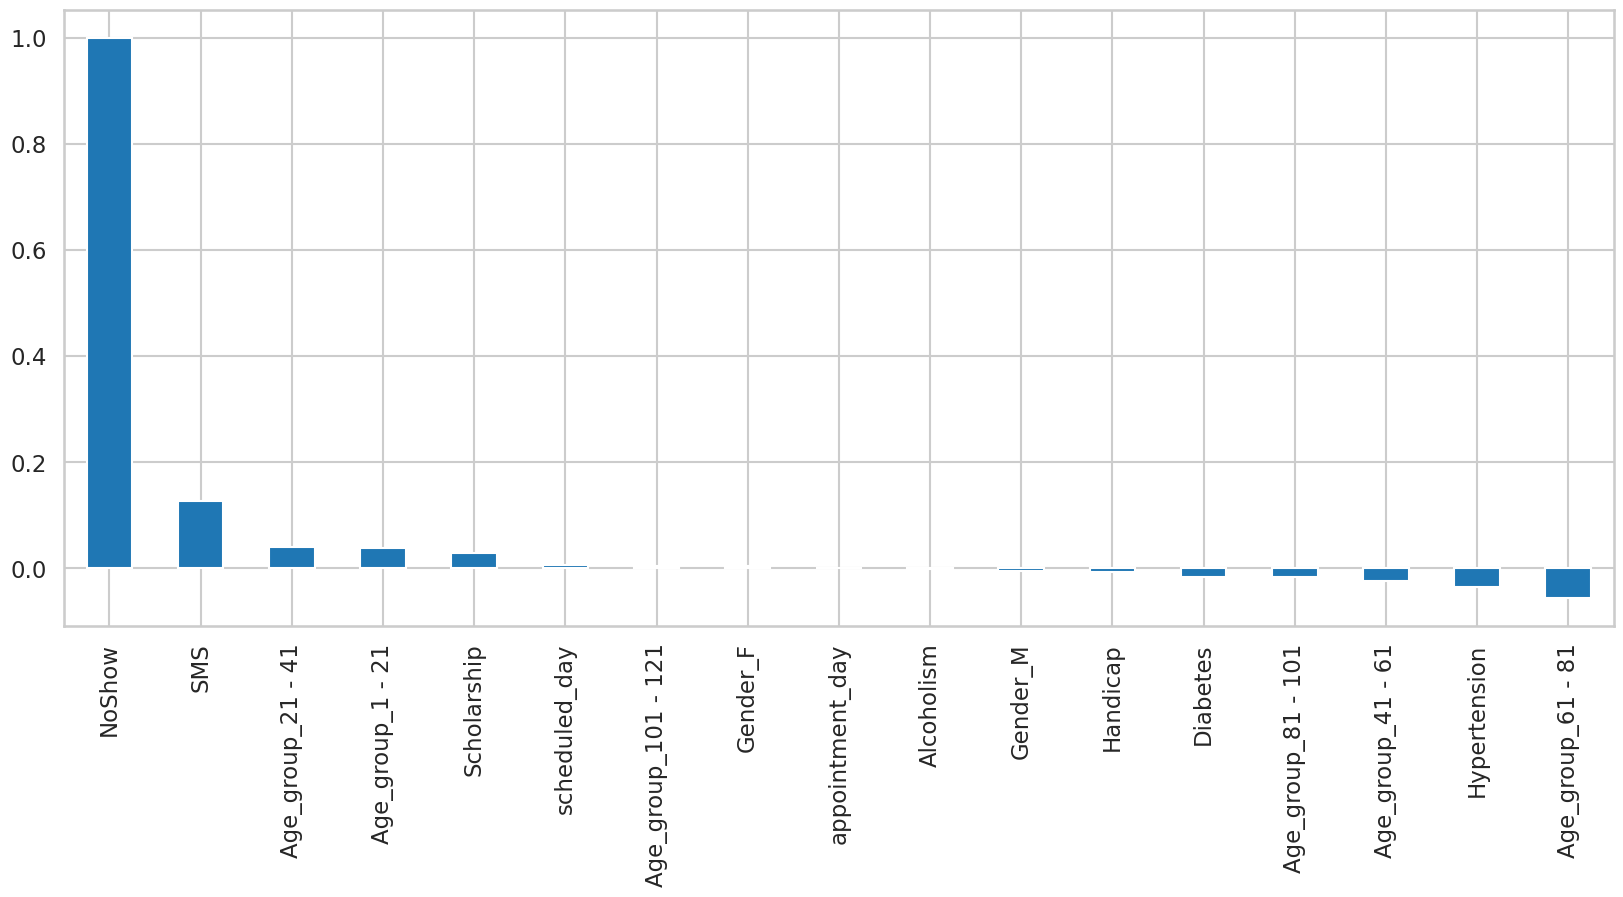

In [ ]:
# Building a corelation graph of all predictors with 'NoShow'
plt.figure(figsize=(20,8))
my_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<ipython-input-87-7009a70148b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(my_data_dummies.corr(), cmap="Paired")


<Axes: >

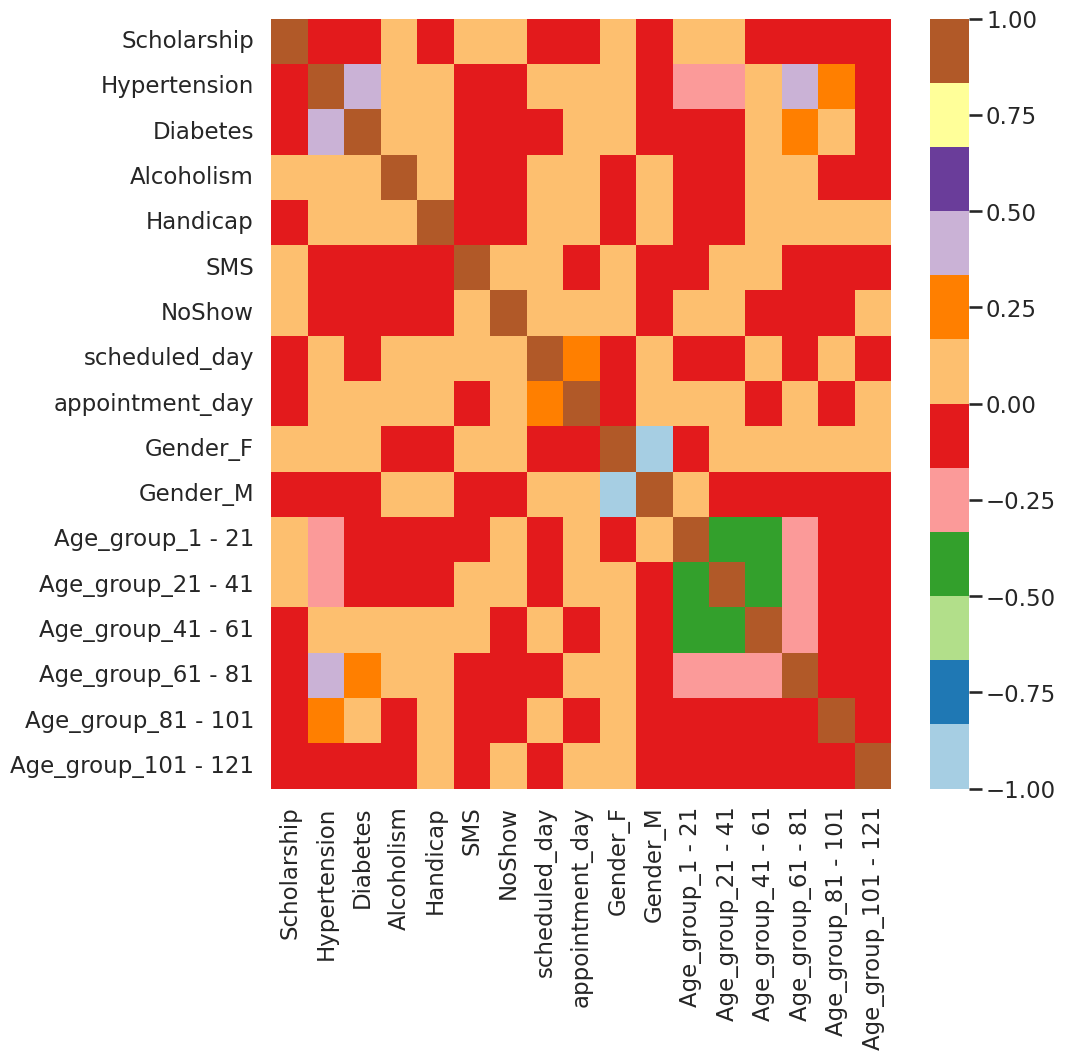

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(my_data_dummies.corr(), cmap="Paired")

# **Project Findings:**



* Ratio of NoShow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
* There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit
* There are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
* There are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
* There are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
* There is no appointments on sunday and on saturday appointments are very less in comparision to other week days.


